# preprocess

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

brain_mri = nib.load(r"D:\image_analysis_DL_course_material\AI-IN-MEDICAL-MATERIALS\03-Data-Formats\03-Preprocessing\IXI662-Guys-1120-T1.nii.gz")
data = brain_mri.get_fdata()

In [6]:
affine = brain_mri.affine
shape = brain_mri.shape
print(affine, shape)
# affine is 4x4 (already includes last row 
# of 0 and 1 as the linear (A) transformation)
# rest 3 are scaling rotation and shearing params


[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] (256, 256, 150)


In [7]:
brain_mri.header.get_zooms()
# each voxel covers 0.93 in 1st dir, 0.9 in second, 1.2 in 3rd dir (axis)
# axial, coronal, sagittal -> might change depending on how scan was setup

(0.9375, 0.9375, 1.2000039)

In [8]:
nib.aff2axcodes(affine)
# shows orientation of scan setup 
#   (anterior->posterior axis, inferior->superior, left->right axis)
# front->back, bottom->top, left->right
# here is coronal, axial, sagittal

('P', 'S', 'R')

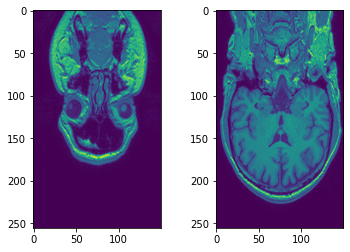

In [11]:
fig, ax = plt.subplots(1,2)
# select slice of brain MRI we want to see
ax[0].imshow(data[40,:,:])
ax[1].imshow(data[120,:,:])
# note since we were moving from bottom to top
# first pic is of neck area then the brain

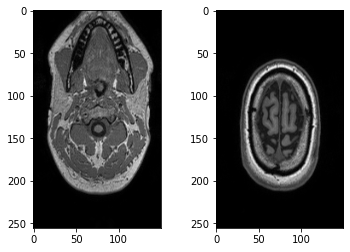

In [12]:
fig, ax = plt.subplots(1,2)
# select slice of brain MRI we want to see
ax[0].imshow(data[:,30,:], cmap='gray')
ax[1].imshow(data[:,200,:], cmap='gray')
# note since we were moving from bottom to top
# first pic is of jaw area then the brain top

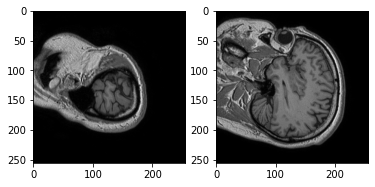

In [13]:
fig, ax = plt.subplots(1,2)
# select slice of brain MRI we want to see
ax[0].imshow(data[:,:,20], cmap='gray')
ax[1].imshow(data[:,:,45], cmap='gray')
# note since we were moving from bottom to top
# first pic is of cheek then the midbrain

In [14]:
# transform voxel to physical coordinates
# lets take a linear line to test transformation
voxel_cord = np.array((0,0,0,1))
physical_cord = affine@voxel_cord
physical_cord

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [16]:
## validate above physical coords are as expected (affine matrix stores the physical cord of the last linear line)
affine[:,3]

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [18]:
# another way to do abive step (long way)
voxel_cord_manual = np.array((0,0,0))
physical_cord_manual = affine[:3,:3]@voxel_cord_manual
physical_cord_manual+=affine[:3,3]
physical_cord_manual

array([ -90.67985535,  102.82944489, -114.82378387])

In [19]:
# convert physical to voxel space
(np.linalg.inv(affine)@physical_cord).round(2)

array([-0.,  0.,  0.,  1.])

In [20]:
## resample/resize the scan
import nibabel.processing
voxel_size = (2,2,2) # in mm
brain_mri_resized = nibabel.processing.conform(
    brain_mri, (128, 128,100), voxel_size)

In [24]:
resized_data = brain_mri_resized.get_fdata()
brain_mri_resized.shape

(128, 128, 100)

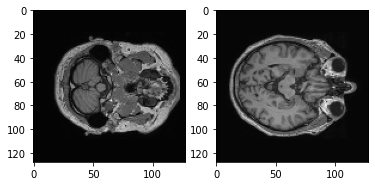

In [25]:
fig, ax = plt.subplots(1,2)
# select slice of brain MRI we want to see
ax[0].imshow(resized_data[:,:,20], cmap='gray')
ax[1].imshow(resized_data[:,:,45], cmap='gray')
# note since we were moving from bottom to top
# first pic is of cheek then the midbrain

In [ ]:
## normalization & standardization
# check included ipynb for short code segs